# Exploratory Data Analysis

This notebook is made for exploring the data and analyzing it.

## Imports

Imports that we need to take care of.

In [1]:
import pandas as pd
import numpy as np
import re
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter

# Loading the data

Let's load the data into memory.

In [2]:
dfs = {}
datasets = ["data/2018/84468NED_UntypedDataSet_17032023_184722.csv", "data/2017/83901NED_UntypedDataSet_17032023_184829.csv", "data/2016/83903NED_UntypedDataSet_17032023_184919.csv"]


for dataset in datasets:
    findings = re.findall(r"(201\d)", dataset)
    year = findings[0]
    df = pd.read_csv(filepath_or_buffer=dataset, delimiter=";")
    relative_columns = df.columns.to_list()[-5:] #there are five relative columns, skip these for now
    print(relative_columns)
    df = df.drop(columns=relative_columns)
    dfs[year] = df

['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']


Let's check if we could join them easily by comparing if they have the same headers.

In [3]:
for comb in combinations(dfs.keys(), r=2):
    year_0 = comb[0]
    year_1 = comb[1]
    if ((dfs[year_0].columns == dfs[year_1].columns).all() == False):
        print('Problem with combination', comb, ", not all columns match.")

Let's inspect if there is a data-related column. If there is, we can just join the table, else we need to make one to seperate the data of 2016, 2017, 2018 by.

In [4]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      16771 non-null  int64 
 1   WijkenEnBuurten                         16771 non-null  object
 2   Gemeentenaam_1                          16771 non-null  object
 3   SoortRegio_2                            16771 non-null  object
 4   Codering_3                              16771 non-null  object
 5   Indelingswijziging_4                    16771 non-null  object
 6   AantalInwoners_5                        16771 non-null  int64 
 7   TotaalVermogenVernielingEnGeweld_6      16771 non-null  object
 8   TotaalVermogensmisdrijven_7             16771 non-null  object
 9   TotaalDiefstal_8                        16771 non-null  object
 10  Fietsendiefstal_9                       16771 non-null  object
 11  Di

--> does not seem like it, so let's make a year column.

In [5]:
dfs["2018"].columns

Index(['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3',
       'Indelingswijziging_4', 'AantalInwoners_5',
       'TotaalVermogenVernielingEnGeweld_6', 'TotaalVermogensmisdrijven_7',
       'TotaalDiefstal_8', 'Fietsendiefstal_9',
       'DiefstalOverigeVervoermiddelen_10',
       'DiefstalUitVanafVervoermiddelen_11',
       'ZakkenrollerijStraatroofEnBeroving_12',
       'TotaalDiefstalUitWoningSchuurED_13',
       'DiefstalUitNietResidentieleGebouwen_14', 'OverigeDiefstalInbraak_15',
       'OverigeVermogensmisdrijven_16', 'TotaalVernielingTegenOpenbareOrde_17',
       'TotaalVernieling_18', 'VernielingAanAuto_19', 'OverigeVernieling_20',
       'OverigeVernielingTegenOpenbareOrde_21',
       'TotaalGeweldsEnSeksueleMisdrijven_22', 'Mishandeling_23',
       'BedreigingEnStalking_24', 'OverigeGeweldsEnSeksueleMisdrijven_25'],
      dtype='object')

In [6]:
columns = dfs["2018"].columns.to_list()
cleaned_columns = []
for col in columns:
    cleaned_col = re.sub(r"(_\d+)", repl="", string=col)
    #r"(_+\d)" --> regular expression that looks for an underscore with after that at least one digit.
    cleaned_columns.append(cleaned_col)

#Go over every dataframe and change the column names
column_renamer = {columns[i]: cleaned_columns[i] for i in range(len(cleaned_columns))}
for key in dfs.keys():
    dfs[key] = dfs[key].rename(columns=column_renamer)

In [7]:
for key in dfs.keys():
    df = dfs[key]
    df["year"] = [year for _ in range(len(df))]

Let's create a big dataframe which has all data together

In [8]:
for key in dfs.keys():
    df = dfs[key]
    df = df.reset_index()
    df["ID"] = [str(id)+"_"+key for id in df["ID"].to_list()]
    dfs[key] = df

df_all = pd.DataFrame(columns=dfs["2018"].columns)

for key in dfs.keys():
    df_all = pd.concat([df_all, dfs[key]])
    dfs[key] = dfs[key].drop(columns="ID")

df_all = df_all.drop(columns="index")

In [9]:
df_all

,ID,WijkenEnBuurten,Gemeentenaam,SoortRegio,Codering,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,...,TotaalVernielingTegenOpenbareOrde,TotaalVernieling,VernielingAanAuto,OverigeVernieling,OverigeVernielingTegenOpenbareOrde,TotaalGeweldsEnSeksueleMisdrijven,Mishandeling,BedreigingEnStalking,OverigeGeweldsEnSeksueleMisdrijven,year
0,0_2018,GM1680,Aa en Hunze,Gemeente,GM1680,.,25390,423,284,199,...,73,59,14,45,14,66,26,23,17,2016
1,1_2018,WK168000,Aa en Hunze,Wijk,WK168000,1,3560,38,22,16,...,9,8,1,7,1,7,3,3,1,2016
2,2_2018,BU16800000,Aa en Hunze,Buurt,BU16800000,1,3415,37,21,15,...,9,8,1,7,1,7,3,3,1,2016
3,3_2018,BU16800009,Aa en Hunze,Buurt,BU16800009,1,145,1,1,1,...,0,0,0,0,0,0,0,0,0,2016
4,4_2018,WK168001,Aa en Hunze,Wijk,WK168001,1,1430,19,16,12,...,1,1,0,1,0,2,1,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188,16188_2016,BU01935150,Zwolle,Buurt,BU01935150,1,3199,33,20,13,...,9,9,2,7,0,4,0,4,0,2016
16189,16189_2016,BU01935160,Zwolle,Buurt,BU01935160,1,72,3,3,2,...,0,0,0,0,0,0,0,0,0,2016
16190,16190_2016,WK019352,Zwolle,Wijk,WK019352,1,867,17,9,6,...,6,6,1,5,0,2,0,0,2,2016
16191,16191_2016,BU01935200,Zwolle,Buurt,BU01935200,1,386,8,2,2,...,6,6,1,5,0,0,0,0,0,2016


Now, let's save it and try to load it (checking if it works).

In [10]:
df_all.to_csv(path_or_buf="data/all_data.csv", sep=";", index=False)

In [11]:
df_all = pd.read_csv(filepath_or_buffer="data/all_data.csv", delimiter=";")

# Visualizations

## Let's do so EDA when considering all datasets.

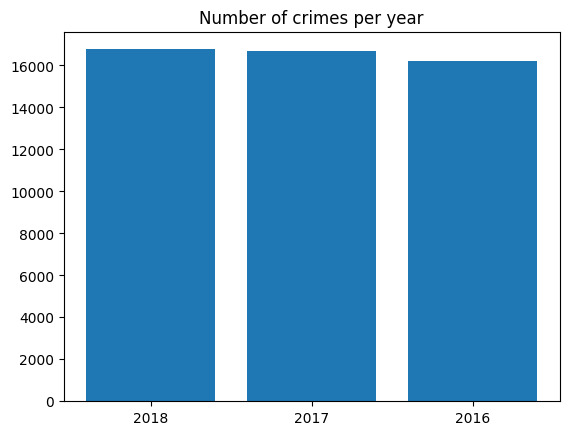

In [12]:
number_of_crimes = [len(dfs[x]) for x in dfs.keys()]
years = list(dfs.keys())

plt.bar(x=years, height=number_of_crimes)
plt.title("Number of crimes per year")
plt.show()


In [13]:
def fix_zeros(dataframes: dict[str, pd.DataFrame], key: str) -> dict[str, pd.DataFrame]:
    for dataframe in dataframes.values():
        dataframe[key] = dataframe[key].replace(r'(\s+)', "", regex=True) #replace all spaces with nothing
        dataframe[key] = dataframe[key].replace(r'(\.)', "0", regex=True) #replace the dots with 0
        dataframe[key] = dataframe[key].astype(int)

    return dfs

In [14]:
dfs["2018"].columns

Index(['index', 'WijkenEnBuurten', 'Gemeentenaam', 'SoortRegio', 'Codering',
       'Indelingswijziging', 'AantalInwoners',
       'TotaalVermogenVernielingEnGeweld', 'TotaalVermogensmisdrijven',
       'TotaalDiefstal', 'Fietsendiefstal', 'DiefstalOverigeVervoermiddelen',
       'DiefstalUitVanafVervoermiddelen', 'ZakkenrollerijStraatroofEnBeroving',
       'TotaalDiefstalUitWoningSchuurED',
       'DiefstalUitNietResidentieleGebouwen', 'OverigeDiefstalInbraak',
       'OverigeVermogensmisdrijven', 'TotaalVernielingTegenOpenbareOrde',
       'TotaalVernieling', 'VernielingAanAuto', 'OverigeVernieling',
       'OverigeVernielingTegenOpenbareOrde',
       'TotaalGeweldsEnSeksueleMisdrijven', 'Mishandeling',
       'BedreigingEnStalking', 'OverigeGeweldsEnSeksueleMisdrijven', 'year'],
      dtype='object')

In [15]:
#CBS used . instead of 0s and strings instead of integers when loading data
#--> fixing it here
to_fix = ["TotaalVermogenVernielingEnGeweld", "TotaalVermogensmisdrijven", "TotaalDiefstal", "TotaalDiefstalUitWoningSchuurED", "TotaalVernielingTegenOpenbareOrde", "TotaalVernieling", "TotaalGeweldsEnSeksueleMisdrijven"]
for fixable in to_fix:
    dfs = fix_zeros(dataframes = dfs, key = fixable)

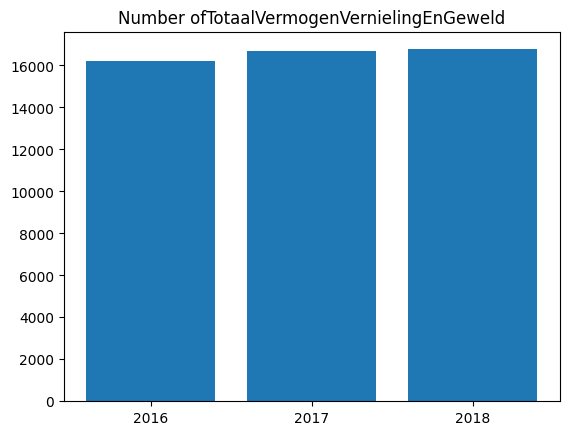

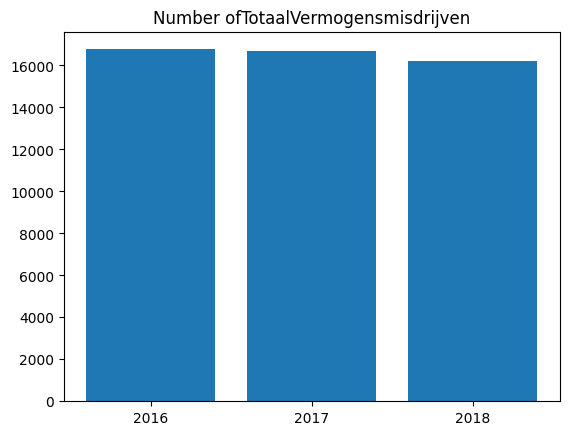

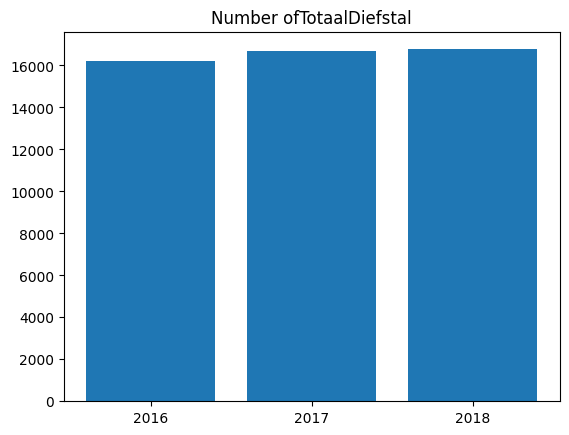

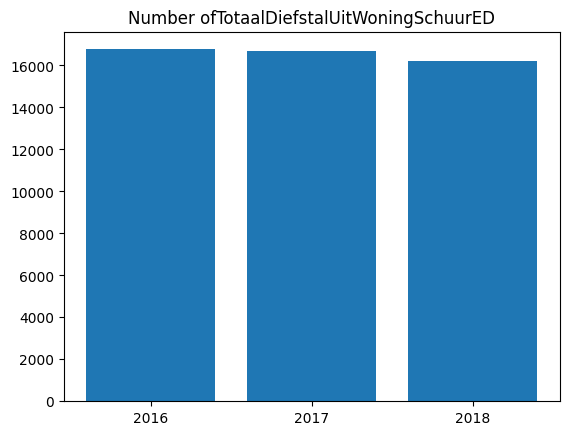

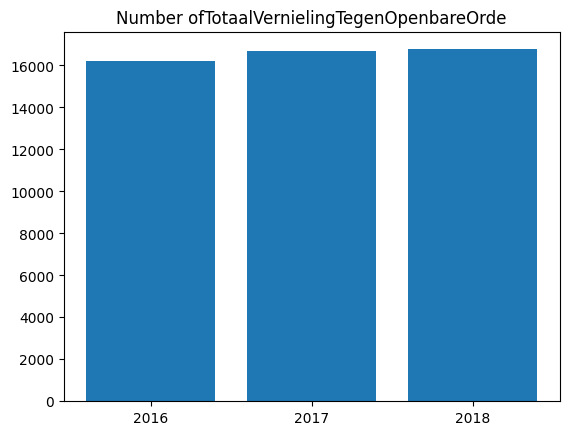

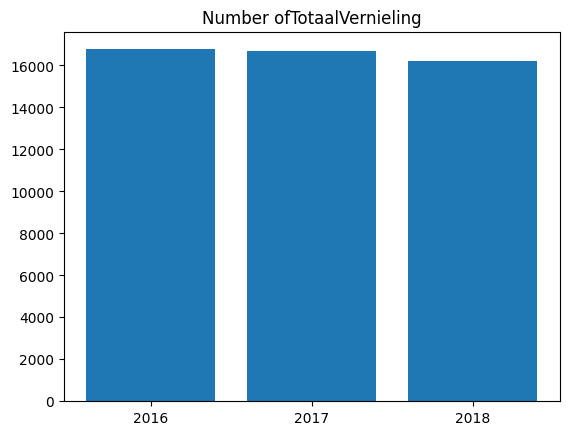

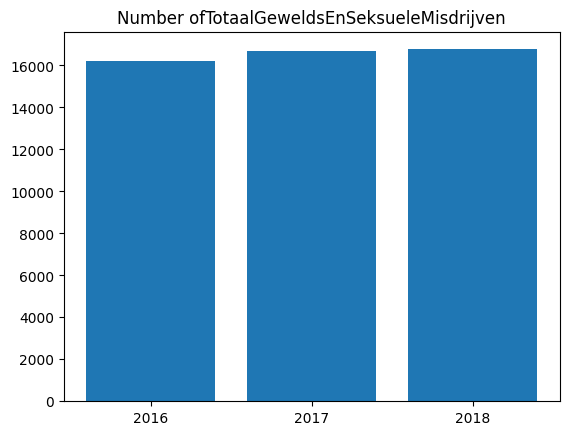

In [16]:
for fixed in to_fix:
    height = [sum(dfs[x][fixed]) for x in dfs.keys()]
    years = list(dfs.keys())

    number_of_crimes.reverse()
    years.reverse()

    plt.bar(x=years, height=number_of_crimes)
    plt.title(str("Number of" + fixed))
    plt.show()

## Let's do so EDA when considering each dataset separately.

In [17]:
dfs_Gemeente_All = df_all[df_all['SoortRegio'] == "Gemeente"]

In [18]:
Counter(df_all["Gemeentenaam"])
df_all["Gemeentenaam"] = df_all["Gemeentenaam"].replace(r'(\s+\s)', "", regex=True) #replace all spaces with another space behind it
#dfs_Gemeente_All["province"] = dfs_Gemeente_All["Gemeentenaam"].map(d, na_action=None)

In [19]:
#Counter(df_all['province'])

In [20]:
#df_all[df_all['province'].isna()]

In [21]:
#gemeentetest = pd.read_csv('data/Gemeenten alfabetisch 2018.csv', delimiter=";")
#gemeentetest = gemeentetest[['Gemeentenaam','Provincienaam']]

#testtest = pd.merge(df_all, gemeentetest[['Gemeentenaam','Provincienaam']], on='Gemeentenaam', how='inner')
#testtest

In [22]:
#gemeentetest = pd.read_csv('data/Gemeenten alfabetisch 2018.csv', delimiter=";")
#gemeentetest

#testtest = pd.merge(df_all,gemeentetest[['Gemeentenaam','Provincienaam']],on='Gemeentenaam', how='left')
#testtest
#gemeentetest['Provincienaam']


In [23]:
Counter(dfs_Gemeente_All['Codering'])

l = dfs_Gemeente_All['Codering'].to_list()
l = [period[:6] for period in l]
dfs_Gemeente_All["Codering"] = l

Counter(dfs_Gemeente_All['Codering'])


C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_25000\4016829729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_Gemeente_All["Codering"] = l


Counter({'GM1680': 3,
         'GM0738': 3,
         'GM0358': 3,
         'GM0197': 3,
         'GM0059': 3,
         'GM0482': 3,
         'GM0613': 3,
         'GM0361': 3,
         'GM0141': 3,
         'GM0034': 3,
         'GM0484': 3,
         'GM1723': 3,
         'GM0060': 3,
         'GM0307': 3,
         'GM0362': 3,
         'GM0363': 3,
         'GM0200': 3,
         'GM0003': 3,
         'GM0202': 3,
         'GM0106': 3,
         'GM0743': 3,
         'GM0744': 3,
         'GM0308': 3,
         'GM0489': 3,
         'GM0203': 3,
         'GM0005': 3,
         'GM0888': 3,
         'GM0370': 3,
         'GM0889': 3,
         'GM1945': 3,
         'GM1724': 3,
         'GM0893': 3,
         'GM0373': 3,
         'GM0748': 3,
         'GM1859': 3,
         'GM1721': 3,
         'GM0753': 3,
         'GM0209': 3,
         'GM0375': 3,
         'GM0310': 3,
         'GM0585': 3,
         'GM1728': 3,
         'GM0376': 3,
         'GM0377': 3,
         'GM1901': 3,
         '

In [24]:
features_crime = pd.read_csv("data/FeaturesMisdaad.csv", delimiter=";")
#convert period column to year column
periods = features_crime["Perioden"].to_list()
periods = [period[:4] for period in periods]
features_crime = features_crime.drop(columns="Perioden")
features_crime["Year"] = periods

features_crime.replace('', np.nan, inplace=True)
features_crime.dropna(inplace=True)
features_crime

,ID,RegioS,Mannen_2,Vrouwen_3,TotaalMetMigratieachtergrond_35,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,ParticuliereHuishoudensExclStudenten_121,TypeEenpersoonshuishouden_133,TypeEenoudergezin_134,TypePaarZonderKind_135,TypePaarMetKindEren_136,BronInkomenAlsWerknemer_137,BronInkomenAlsZelfstandige_138,Werkloosheid_155,Year
0,1618,GM1680,12603.0,12683.0,1584.0,92.0,70.7,27.7,1.6,5.6,10.9,25.0,24.6,33.8,34.1,33.1,42.2,510.0,2017
1,1619,GM1680,12666.0,12724.0,1644.0,92.0,73.1,25.4,1.5,6.0,11.0,25.7,25.0,33.9,34.0,33.2,44.0,410.0,2018
2,1620,GM1680,12659.0,12727.0,1707.0,92.0,74.1,25.7,0.2,6.1,11.1,26.2,26.3,35.0,36.6,34.5,47.7,310.0,2019
3,1646,GM0738,6615.0,6452.0,759.0,259.0,71.6,28.3,0.2,3.4,4.9,24.2,26.0,32.9,33.7,31.2,41.9,160.0,2017
4,1647,GM0738,6684.0,6469.0,789.0,261.0,72.4,26.9,0.6,3.6,5.0,25.3,26.4,33.1,34.0,31.8,43.1,120.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,21891,GM0642,21643.0,22943.0,9831.0,2196.0,55.4,44.0,0.6,19.2,19.9,24.7,22.8,33.3,33.2,31.5,47.3,620.0,2018
2174,21892,GM0642,21656.0,22983.0,10111.0,2199.0,56.4,43.4,0.1,19.6,19.9,26.3,24.4,35.3,37.2,32.9,51.5,480.0,2019
2175,21918,GM0193,61727.0,63821.0,20559.0,1128.0,52.5,47.0,0.5,101.9,55.0,23.7,22.4,34.0,32.4,30.6,42.3,2400.0,2017
2176,21919,GM0193,62030.0,64086.0,21093.0,1135.0,52.3,47.2,0.5,103.0,55.8,24.1,23.2,33.5,33.2,30.9,43.8,2090.0,2018


In [25]:
Counter(features_crime['RegioS'])

Counter({'GM1680': 3,
         'GM0738': 2,
         'GM0358': 3,
         'GM0197': 3,
         'GM0059': 3,
         'GM0482': 3,
         'GM0613': 3,
         'GM0361': 3,
         'GM0141': 3,
         'GM0034': 3,
         'GM0484': 3,
         'GM1723': 3,
         'GM1959': 1,
         'GM0060': 3,
         'GM0307': 3,
         'GM0362': 3,
         'GM0363': 3,
         'GM0200': 3,
         'GM0003': 3,
         'GM0202': 3,
         'GM0106': 3,
         'GM0743': 3,
         'GM0744': 3,
         'GM0308': 3,
         'GM0489': 3,
         'GM0203': 3,
         'GM0005': 2,
         'GM0888': 3,
         'GM1954': 1,
         'GM0370': 3,
         'GM0889': 3,
         'GM0007': 1,
         'GM1945': 3,
         'GM1724': 3,
         'GM0893': 3,
         'GM0373': 3,
         'GM0748': 3,
         'GM1859': 3,
         'GM1721': 3,
         'GM0753': 3,
         'GM0209': 3,
         'GM0375': 3,
         'GM0063': 1,
         'GM0310': 3,
         'GM0585': 2,
         '

In [26]:
A = set(dfs_Gemeente_All['Codering'])
B = set(features_crime['RegioS'])

s = A.difference(B)
print(s)
print(len(s))

print(dfs_Gemeente_All.shape)
dfs_Gemeente_All = dfs_Gemeente_All[~dfs_Gemeente_All['Codering'].isin(list(s))]
print(dfs_Gemeente_All.shape)

A = set(dfs_Gemeente_All['Codering'])
B = set(features_crime['RegioS'])

s = A.difference(B)
print(s)
print(len(s))

{'GM0846', 'GM0860', 'GM0844'}
3
(1158, 28)
(1155, 28)
set()
0


In [27]:
A = set(dfs_Gemeente_All['Codering'])
B = set(features_crime['RegioS'])

s = B.difference(A)
print(s)
print(len(s))

print(features_crime.shape)
features_crime = features_crime[~features_crime['RegioS'].isin(list(s))]
print(features_crime.shape)

A = set(dfs_Gemeente_All['Codering'])
B = set(features_crime['RegioS'])

s = B.difference(A)
print(s)
print(len(s))

{'GM1970', 'GM1966', 'GM1959', 'GM1969', 'GM1963', 'GM1978', 'GM1961', 'GM1960', 'GM1954'}
9
(1123, 19)
(1114, 19)
set()
0


In [28]:
features_crime_average = features_crime.groupby('RegioS').mean()
display(features_crime_average)

C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_25000\2959682727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  features_crime_average = features_crime.groupby('RegioS').mean()


,ID,Mannen_2,Vrouwen_3,TotaalMetMigratieachtergrond_35,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,ParticuliereHuishoudensExclStudenten_121,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,Werkloosheid_155
RegioS,,,,,,,,,,,,,
GM0003,2515.0,5757.666667,6073.333333,1661.333333,497.333333,48.733333,51.133333,0.166667,3.766667,5.533333,28.900000,29.033333,196.666667
GM0005,2906.5,5238.000000,5239.000000,790.000000,235.000000,68.450000,31.200000,0.400000,3.200000,4.350000,31.150000,30.150000,175.000000
GM0007,3130.0,4534.000000,4385.000000,973.000000,82.000000,70.600000,28.400000,1.000000,1.700000,4.000000,29.000000,29.600000,150.000000
GM0009,4054.5,3611.500000,3678.500000,515.500000,161.000000,76.600000,23.300000,0.100000,1.150000,2.950000,32.300000,30.900000,105.000000
GM0010,5203.0,12481.000000,12367.000000,4439.333333,187.000000,61.600000,37.933333,0.466667,10.566667,11.466667,29.500000,30.066667,413.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1949,19679.5,23404.500000,22665.500000,3980.500000,161.500000,67.450000,32.100000,0.400000,13.450000,20.000000,30.000000,29.800000,665.000000
GM1950,20407.5,12486.500000,12455.000000,2594.000000,90.500000,66.800000,29.700000,3.400000,7.500000,11.100000,29.200000,30.300000,340.000000
GM1952,12903.5,30561.500000,30364.500000,8712.500000,217.500000,61.900000,37.500000,0.600000,19.250000,27.300000,30.150000,30.000000,970.000000


In [29]:
def fix_zeros_Wouter(dataframe: pd.DataFrame, low: int, high: int) -> pd.DataFrame:
    for i in range(low, high):
        dataframe.iloc[:,i] =  dataframe.iloc[:,i].replace(r'(\s+)', "", regex=True)
        dataframe.iloc[:,i] =  dataframe.iloc[:,i].replace(r'(\.)', "0", regex=True)
        dataframe.iloc[:,i] = dataframe.iloc[:,i].astype(int)

    return dataframe

In [30]:
dfs_Gemeente_All = fix_zeros_Wouter(dfs_Gemeente_All, low=5, high=24)

C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_25000\2054924098.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.iloc[:,i] = dataframe.iloc[:,i].astype(int)


In [31]:
dfs_Gemeente_All_average = dfs_Gemeente_All.groupby('Codering').mean()
display(dfs_Gemeente_All_average)

C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_25000\67170250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfs_Gemeente_All_average = dfs_Gemeente_All.groupby('Codering').mean()


,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,Fietsendiefstal,DiefstalOverigeVervoermiddelen,DiefstalUitVanafVervoermiddelen,ZakkenrollerijStraatroofEnBeroving,TotaalDiefstalUitWoningSchuurED,DiefstalUitNietResidentieleGebouwen,OverigeDiefstalInbraak,OverigeVermogensmisdrijven,TotaalVernielingTegenOpenbareOrde,TotaalVernieling,VernielingAanAuto,OverigeVernieling,OverigeVernielingTegenOpenbareOrde,TotaalGeweldsEnSeksueleMisdrijven,year
Codering,,,,,,,,,,,,,,,,,,,,
GM0003,0.0,11924.333333,352.666667,218.000000,171.000000,33.333333,8.666667,11.000000,3.000000,28.333333,56.000000,30.666667,47.000000,59.666667,47.333333,21.000000,26.333333,12.333333,75.000000,2016.0
GM0005,0.0,10462.333333,149.666667,97.666667,62.000000,8.333333,2.666667,4.333333,0.666667,19.666667,7.000000,19.333333,35.666667,33.000000,27.333333,10.000000,17.333333,5.666667,19.000000,2016.0
GM0007,0.0,8945.000000,178.500000,108.000000,76.000000,4.500000,3.000000,5.000000,0.000000,21.000000,16.500000,26.000000,32.000000,37.500000,31.500000,8.000000,23.500000,6.000000,33.000000,2016.0
GM0009,0.0,7310.666667,106.333333,68.333333,42.666667,9.666667,1.000000,3.000000,0.333333,8.666667,14.000000,6.000000,25.666667,24.333333,21.666667,6.000000,15.666667,2.666667,13.666667,2016.0
GM0010,0.0,24965.666667,858.666667,526.000000,427.333333,63.000000,11.333333,43.333333,14.333333,76.000000,134.333333,85.000000,98.666667,162.000000,129.333333,48.666667,80.666667,32.666667,170.666667,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1949,0.0,46112.000000,830.000000,499.000000,370.000000,64.000000,20.000000,48.000000,2.000000,89.000000,56.000000,91.000000,129.000000,187.000000,155.000000,76.000000,79.000000,32.000000,144.000000,2016.0
GM1950,0.0,24684.000000,915.000000,623.000000,542.000000,32.000000,6.000000,34.000000,9.000000,78.000000,285.000000,98.000000,81.000000,133.000000,94.000000,38.000000,56.000000,39.000000,159.000000,2016.0
GM1952,0.0,60951.000000,1433.000000,836.000000,585.000000,109.000000,36.000000,32.000000,6.000000,132.000000,138.000000,132.000000,251.000000,317.000000,251.000000,83.000000,168.000000,66.000000,280.000000,2016.0


In [49]:
features_crime_average.rename(columns={'RegioS':'Codering'}, inplace=True)
dfs_gemeente_and_features = pd.concat([dfs_Gemeente_All_average, features_crime_average], axis=1)

dfs_gemeente_and_features


,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,Fietsendiefstal,DiefstalOverigeVervoermiddelen,DiefstalUitVanafVervoermiddelen,ZakkenrollerijStraatroofEnBeroving,TotaalDiefstalUitWoningSchuurED,...,TotaalMetMigratieachtergrond_35,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,ParticuliereHuishoudensExclStudenten_121,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,Werkloosheid_155
GM0003,0.0,11924.333333,352.666667,218.000000,171.000000,33.333333,8.666667,11.000000,3.000000,28.333333,...,1661.333333,497.333333,48.733333,51.133333,0.166667,3.766667,5.533333,28.900000,29.033333,196.666667
GM0005,0.0,10462.333333,149.666667,97.666667,62.000000,8.333333,2.666667,4.333333,0.666667,19.666667,...,790.000000,235.000000,68.450000,31.200000,0.400000,3.200000,4.350000,31.150000,30.150000,175.000000
GM0007,0.0,8945.000000,178.500000,108.000000,76.000000,4.500000,3.000000,5.000000,0.000000,21.000000,...,973.000000,82.000000,70.600000,28.400000,1.000000,1.700000,4.000000,29.000000,29.600000,150.000000
GM0009,0.0,7310.666667,106.333333,68.333333,42.666667,9.666667,1.000000,3.000000,0.333333,8.666667,...,515.500000,161.000000,76.600000,23.300000,0.100000,1.150000,2.950000,32.300000,30.900000,105.000000
GM0010,0.0,24965.666667,858.666667,526.000000,427.333333,63.000000,11.333333,43.333333,14.333333,76.000000,...,4439.333333,187.000000,61.600000,37.933333,0.466667,10.566667,11.466667,29.500000,30.066667,413.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1949,0.0,46112.000000,830.000000,499.000000,370.000000,64.000000,20.000000,48.000000,2.000000,89.000000,...,3980.500000,161.500000,67.450000,32.100000,0.400000,13.450000,20.000000,30.000000,29.800000,665.000000
GM1950,0.0,24684.000000,915.000000,623.000000,542.000000,32.000000,6.000000,34.000000,9.000000,78.000000,...,2594.000000,90.500000,66.800000,29.700000,3.400000,7.500000,11.100000,29.200000,30.300000,340.000000
GM1952,0.0,60951.000000,1433.000000,836.000000,585.000000,109.000000,36.000000,32.000000,6.000000,132.000000,...,8712.500000,217.500000,61.900000,37.500000,0.600000,19.250000,27.300000,30.150000,30.000000,970.000000
GM1955,0.0,35372.000000,868.000000,604.333333,467.333333,76.333333,26.666667,80.666667,10.666667,122.666667,...,4324.333333,337.333333,65.366667,34.500000,0.133333,16.266667,15.300000,31.166667,31.266667,513.333333


In [ ]:
#TODO: map GM-code to city
#gemeentetest = pd.read_csv('data/Gemeenten alfabetisch 2018.csv', delimiter=";")
#gemeentetest = gemeentetest[['Gemeentenaam','Provincienaam']]
dfs_gemeente_and_features['Gemeentenaam'] = 

In [48]:
#check NaN
dfs_gemeente_and_features.isna().sum().sum()

0

In [44]:
df_all = fix_zeros_Wouter(df_all, low=6, high=25)

In [45]:
#df_all.columns.values
#df_all['total_crime'] = df_all.iloc[:,6:25].sum(axis=1)
#df_all.iloc[:,6:25]/df_all['total_crime']
#df_all# 